# Experiments on the Zipf's Law

By *Alejandro Suárez Hernández*, October 2016

This work revolves around the Zipf's law. Our purpose is to analyze large corpus (one in English and another in Spanish) of text and test whether the Zipf model fits well the words' distribution.

Due to the simplicity of the exercise, we will implement our own tokenizer instead of using one from an external library.

## Function definition and testing

We start importing the required modules and defining the methods we will use through the exercise.

In [1]:
from __future__ import print_function, division
from string import whitespace, punctuation
from math import sqrt
from matplotlib import pyplot as plt
%matplotlib inline

import re

def tokenize(txt,delimiters=whitespace+punctuation,onlyalpha=True,upper=True):
    """
    Tokenization method. It returns an array with the
    tokens that are present in a given string. The method
    is able to filter out some uninteresting tokens like
    numbers. It is also capable of discarding the punctuation
    signs. If requested, it will convert all the tokens to upper
    case. Arguments:
        - txt: input string
        - delimiters (default=whitespace+punctuation): the delimiters used to split
          the tokens
        - onlyalpha (default=True): filters out non alpha tokens iff True
        - upper (default=True): convert tokens to upper case. Useful if we want to
          ignore case when comparing two tokens.
    """
    txt = txt.strip(delimiters) # This is done to avoid empty strings ('') in the output
    if upper: txt = txt.upper()
    tokens = re.split('['+delimiters+']+',txt)
    if onlyalpha: tokens = filter(unicode.isalpha,tokens)
    return tokens

def count_occurrences(tokens):
    """
    Given a list of tokens, returns a dictionary in which
    the tokens are the keys and the values are the number
    of occurrences of each key. Arguments:
        - tokens: array of tokens
    """
    word_occurrences = {}
    for token in tokens:
        try: word_occurrences[token] += 1
        except KeyError: word_occurrences[token] = 1
    return word_occurrences

def sort_occurrences(occurrences):
    """
    Given a dictionary in which each value is the number of
    occurrences of its key, return the occurrences sorted
    by rank (i.e. values in decreasing order). It also
    returns an iterable element with the ranks (from 1 to N,
    being N the number of tokens) for convenience. Arguments:
        - occurrences: dictionary of TOKENS: #occurrences
    """
    sorted_occurrences = occurrences.values()
    sorted_occurrences.sort(reverse=True)
    return sorted_occurrences

def compute_k_vector(occurrences):
    """
    Given a vector of occurrences in decreasing order, returns
    a vector of the same length with the estimation of K
    (proportionality constant in the Zipf Law) for
    each rank. Arguments:
        - occurrences: occurrences in decreasing order (numeric array)
    """
    N = len(occurrences)
    ranks = xrange(1,N+1)
    k_vector = [rank*occurrences[rank-1] for rank in ranks]
    return k_vector

def compute_statistics(sample):
    """Compute the mean, the standard deviation and the
    coefficient of variation of a sample with cardinality
    greater than zero. Arguments:
        - sample: array of numeric values
    """
    N = len(sample)
    mean = sum(sample)/N
    sqdev = map(lambda x: (x-mean)*(x-mean), sample)
    var = sum(sqdev)/(N-1) # The -1 is to calculate the unbiased estimator of the variance
    std = sqrt(var)
    cvar = std/mean
    return mean,std,cvar

def lms_k(occurrences):
    """
    Computes the value of K that minimizes the minimum square error
    of the Zipf Law model fit for a particular set of occurrences.
    Arguments:
        - occurrences: sorted (in decreasing order) vector of occurrences
        - k_vector: the estimations of K for each rank.
    """
    N = len(occurrences)
    ranks = xrange(1,N+1)
    numerator = sum([occurrences[rank-1]/rank for rank in ranks])
    denominator = sum([1/(rank*rank) for rank in ranks])
    k_opt = numerator/denominator
    return k_opt

def ideal_zipf(N, k):
    """
    Returns an array in which each position idx contains the ideal value
    for rank (idx+1) of the Zipf model with the given proportionality
    constant (method used for graphical aids).
    """
    ideal = [k/rank for rank in xrange(1,N+1)]
    return ideal

The next snippet tests the previous methods and show examples of ussage:

In [2]:
# Example string for testing. Biblical quotes are great since they
# contain numbers and punctuation signs.
example = u"""Matthew 18:19
Again, I tell you truly that if two of you on the
earth agree about anything you ask for,
it will be done for you by My Father in heaven.
"""

# Testing the tokenize method
tokens1 = tokenize(example)
tokens2 = tokenize(example,delimiters=whitespace,onlyalpha=False)
print("Discard non alpha str, discard punctuation and convert to upper case: {}\n".format(tokens1))
print("Don't discard non-alpha str, include punctuation, convert to uper-case: {}\n".format(tokens2))

# Testing the count_occurrences method
occurrences = count_occurrences(tokens1)
print("For each token: #occurrences: {}\n".format(occurrences))

# Testing the sort_occurrences method
sorted_occurrences = sort_occurrences(occurrences)
print("Sorted occurrences: {}\n".format(sorted_occurrences))

# Testing the compute_k_vector method
k_vector = compute_k_vector(sorted_occurrences)
print("Estimations of K: {}\n".format(k_vector))

# Testing the compute_statistics method
mean,std,cvar = compute_statistics(k_vector)
print("mean={}; std={}; cvar={}\n".format(mean,std,cvar))

# Testing the lms_k method
k_opt = lms_k(sorted_occurrences)
print("LMS K: {}\n".format(k_opt))

# Delete the previous local variables so they do not pollute the workspace
del example, tokens1, tokens2, occurrences, sorted_occurrences, k_vector, mean, std, cvar, k_opt

Discard non alpha str, discard punctuation and convert to upper case: [u'MATTHEW', u'AGAIN', u'I', u'TELL', u'YOU', u'TRULY', u'THAT', u'IF', u'TWO', u'OF', u'YOU', u'ON', u'THE', u'EARTH', u'AGREE', u'ABOUT', u'ANYTHING', u'YOU', u'ASK', u'FOR', u'IT', u'WILL', u'BE', u'DONE', u'FOR', u'YOU', u'BY', u'MY', u'FATHER', u'IN', u'HEAVEN']

Don't discard non-alpha str, include punctuation, convert to uper-case: [u'MATTHEW', u'18:19', u'AGAIN,', u'I', u'TELL', u'YOU', u'TRULY', u'THAT', u'IF', u'TWO', u'OF', u'YOU', u'ON', u'THE', u'EARTH', u'AGREE', u'ABOUT', u'ANYTHING', u'YOU', u'ASK', u'FOR,', u'IT', u'WILL', u'BE', u'DONE', u'FOR', u'YOU', u'BY', u'MY', u'FATHER', u'IN', u'HEAVEN.']

For each token: #occurrences: {u'BE': 1, u'ABOUT': 1, u'THAT': 1, u'TWO': 1, u'MATTHEW': 1, u'DONE': 1, u'YOU': 4, u'HEAVEN': 1, u'FATHER': 1, u'TRULY': 1, u'ASK': 1, u'EARTH': 1, u'AGAIN': 1, u'FOR': 2, u'I': 1, u'IT': 1, u'IN': 1, u'THE': 1, u'BY': 1, u'AGREE': 1, u'IF': 1, u'ON': 1, u'ANYTHING': 1, u'OF

## Tokenizing English and Spanish corpus

Next we read both the English corpus and the Spanish corpus and tokenize them. For now will filter out punctuation signs and numbers.

In [ ]:
# Create a dictionary for each of the languages. This way we are not crowding the workspace with
# variables.
en = {}
es = {}

# Tokenize English text
with open('en.txt') as f:
    en['txt'] = unicode(f.read(),'utf-8')    
en['tokens'] = tokenize(en['txt'])

# Tokenize Spanish text
with open('es.txt') as f:
    es['txt'] = unicode(f.read(),'utf-8')
es['tokens'] = tokenize(es['txt'])

## Counting and sorting by rank the number of occurrences of each token

The next step is to count the number of repetitions of each token. After this we have to sort the occurrences from highest to lowest.

In order to compare the resulting distribution with an ideal Zipf model, we also compute the LMS (Least Means Square) estimator of the K parameter as follows:
$$ \hat{K} = \textrm{argmin}_K \sum_r \left( \frac{K}{r} - X_r \right)^2 $$
where $ X_r $ is the number of occurrences of the token with rank $ r $. It turns out that the LMS estimator can be obtained (using basic calculus techniques) and it is:
$$ \hat{K} = \frac{\sum_r X_r/r}{\sum 1/r^2} $$

After this, we plot the sorted occurences against the rank of the corresponding tokens. We also draw the ideal Zipf model with the LMS estimator of K. This will help to visualize the trend of the data and whether it is appropriate to fit the Zipf model to it.

In [4]:
# Compute and sort occurrences in EN text
en['occurrences'] = count_occurrences(en['tokens']) # Dict of occurrences
en['sorted_occurrences'] = sort_occurrences(en['occurrences']) # Sorted occurrences
en['ranks'] = xrange(1,len(en['sorted_occurrences'])+1) # From 1 to #Tokens
# en['k_vector'] = compute_k_vector(en['sorted_occurrences']) # Vector of K estimations
en['k_lms'] = lms_k(en['sorted_occurrences']) # Optimum K according to LMS criteria
en['ideal'] = ideal_zipf(len(en['sorted_occurrences']),en['k_lms']) # Ideal Zipf model with K=K_opt

# Compute and sort occurrences in ES text
es['occurrences'] = count_occurrences(es['tokens']) # Dict of occurrences
es['sorted_occurrences'] = sort_occurrences(es['occurrences']) # Sorted occurrences
es['ranks'] = xrange(1,len(es['sorted_occurrences'])+1) # From 1 to #Tokens 
# es['k_vector'] = compute_k_vector(es['sorted_occurrences']) # Vector of K estimations
es['k_lms'] = lms_k(es['sorted_occurrences']) # Optimum K according to LMS criteria
es['ideal'] = ideal_zipf(len(es['sorted_occurrences']),es['k_lms']) # Ideal Zipf m

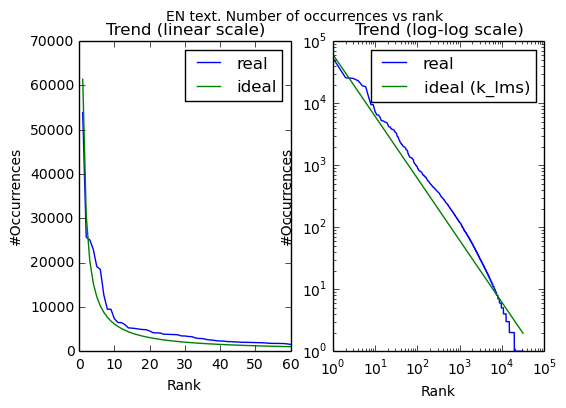

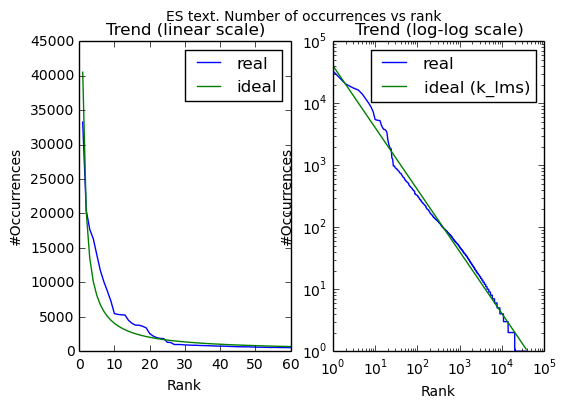

In [5]:
# Visualize trend in EN text
plt.subplot(1,2,1)
plt.hold('on')
h1, = plt.plot(xrange(1,61),en['sorted_occurrences'][:60]) # Plot just the 60 first ranks for clarity
h2, = plt.plot(xrange(1,61),en['ideal'][:60])
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (linear scale)')
plt.legend((h1,h2),('real','ideal'))
plt.subplot(1,2,2)
plt.hold('on')
h3, = plt.plot(en['ranks'],en['sorted_occurrences'])
h4, = plt.plot(en['ranks'],en['ideal'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (log-log scale)')
plt.legend((h3,h4),('real','ideal (k_lms)'))
plt.suptitle('EN text. Number of occurrences vs rank')

plt.figure()

# Visualize trend in ES text
plt.subplot(1,2,1)
plt.hold('on')
h1, = plt.plot(xrange(1,61),es['sorted_occurrences'][:60]) # Plot just the 60 first ranks for clarity
h2, = plt.plot(xrange(1,61),es['ideal'][:60])
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (linear scale)')
plt.legend((h1,h2),('real','ideal'))
plt.subplot(1,2,2)
plt.hold('on')
h3, = plt.plot(es['ranks'],es['sorted_occurrences'])
h4, = plt.plot(es['ranks'],es['ideal'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (log-log scale)')
plt.legend((h3,h4),('real','ideal (k_lms)'))
plt.suptitle('ES text. Number of occurrences vs rank')

As we can see in the previous plots, the number of occurrences against rank in both texts is approximated fairly well by the Zipf model. The same plot in log-log scale yields a curve is very close to a line. Even though the differences with respect to the ideal Zipf model are significant, we have to take into consideration that the Zipf Law is purely empirical and that a great amount of noise and variability are to be expected. Bearing this in mind, the Zipf Law seems plausible.

## Calculating mean and deviation of the proportionality constant

Now we will analyze the sample of the proportionality constant's estimators that are obtained as the product of the rank and the number of occurrences for each word. This is:
$$ K = (K_1 \quad K_2 \quad ... \quad K_N) $$
where $ K_r = r \cdot X_r $. A small deviation suggests that the analyzed text is large enough (we need a large corpus in order for Zipf Law to manifest) and that the fit, since the proportionality constant is the same for all the ranks. Alternatively, a very large deviation can be interpreted as a large amount of noise (perhaps not enough data) or that the distribution does not follow the Zipf Law at all.

In [6]:
en['k_vector'] = compute_k_vector(en['sorted_occurrences'])
en['k_mean'], en['k_std'], en['k_cvar'] = compute_statistics(en['k_vector'])
print("EN text; proportionality constant K; mean: {}, std: {}, cvar: {}%".format(
        en['k_mean'],en['k_std'],en['k_cvar']*100))

es['k_vector'] = compute_k_vector(es['sorted_occurrences'])
es['k_mean'], es['k_std'], es['k_cvar'] = compute_statistics(es['k_vector'])
print("ES text; proportionality constant K; mean: {}, std: {}, cvar: {}%".format(
        es['k_mean'],es['k_std'],es['k_cvar']*100))

EN text; proportionality constant K; mean: 47603.5295445, std: 26931.4234765, cvar: 56.57442575%
ES text; proportionality constant K; mean: 34784.877557, std: 7927.64693997, cvar: 22.7904983336%


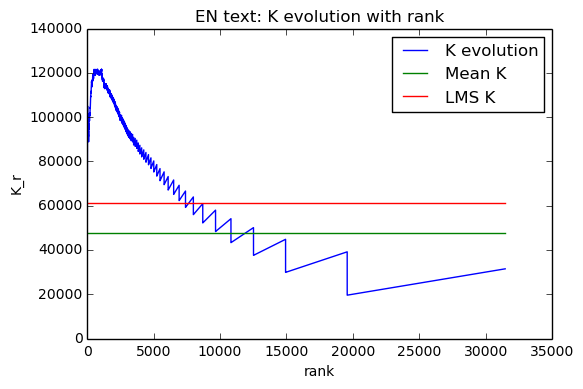

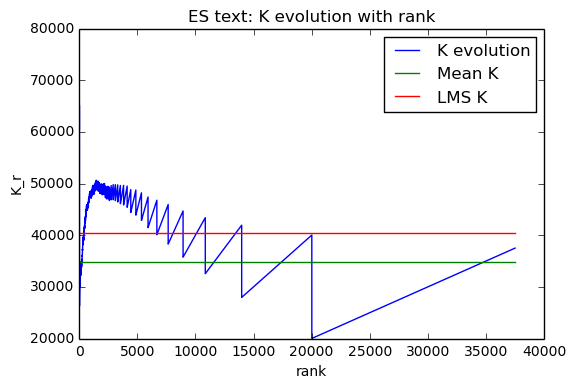

In [7]:
# Print K evolution with the rank, mean K and optimum K (according to LMS criteria) for the EN text
plt.hold('on')
h1, = plt.plot(en['ranks'],en['k_vector'])
h2, = plt.plot([1,len(en['ranks'])], [en['k_mean']]*2)
h3, = plt.plot([1,len(en['ranks'])], [en['k_lms']]*2)
plt.title('EN text: K evolution with rank')
plt.xlabel('rank')
plt.ylabel('K_r')
plt.legend((h1,h2,h3),('K evolution', 'Mean K', 'LMS K'))

plt.figure()

# Print K evolution with the rank, mean K and optimum K (according to LMS criteria) for the ES text
plt.hold('on')
h1, = plt.plot(es['ranks'],es['k_vector'])
h2, = plt.plot([1,len(es['ranks'])], [es['k_mean']]*2)
h3, = plt.plot([1,len(es['ranks'])], [es['k_lms']]*2)
plt.title('ES text: K evolution with rank')
plt.xlabel('rank')
plt.ylabel('K_r')
plt.legend((h1,h2,h3),('K evolution', 'Mean K', 'LMS K'))


The first thing to notice is that we use the coefficient of variation $ C_v = std/mean $ instead of the raw deviation to show in perspective how large is the deviation in comparison with the mean.

We can see that in the case of the English corupus, the coefficient of variation is very large (roughly a 57%). This means that the $ K_r $ values are very unstable in the English text. This can be due to an inherent difficulty of the languaje to accomodate to the Zipf Law or, more probably, to randomness or to a not big enogh corpus. Takint into account how close was the actual shape of the real distribution of the words to that of an ideal Zipf model, the last hypothesis is more suitable.

In the Spanish text the $ K_r $ are considerably more stable. The variance is much smaller and, therefore, the result is more akin to the Zipf Law with a coefficient of variation as low as 23%. This is consistent with Zipf Law.

## Tokenizing at the character level

Now we want to know if the Zipf Law still holds for individual characters. Now we will focus on extracting the characters of the corpus as tokens and perform the same analysis as before. We start by tokenizing at the character level and computing the array of sorted occurrences.

In [8]:
en_char = {}
es_char = {}

en_char['tokens'] = [char for word in tokenize(en['txt']) for char in word]

es_char['tokens'] = [char for word in tokenize(es['txt']) for char in word]

# Compute and sort occurrences in EN text
en_char['occurrences'] = count_occurrences(en_char['tokens']) # Dict of occurrences
en_char['sorted_occurrences'] = sort_occurrences(en_char['occurrences']) # Sorted occurrences
en_char['ranks'] = xrange(1,len(en_char['sorted_occurrences'])+1) # From 1 to #Tokens
# en['k_vector'] = compute_k_vector(en['sorted_occurrences']) # Vector of K estimations
en_char['k_lms'] = lms_k(en_char['sorted_occurrences']) # Optimum K according to LMS criteria
en_char['ideal'] = ideal_zipf(len(en_char['sorted_occurrences']),en_char['k_lms']) # Ideal Zipf model with K=K_opt

# Compute and sort occurrences in ES text
es_char['occurrences'] = count_occurrences(es_char['tokens']) # Dict of occurrences
es_char['sorted_occurrences'] = sort_occurrences(es_char['occurrences']) # Sorted occurrences
es_char['ranks'] = xrange(1,len(es_char['sorted_occurrences'])+1) # From 1 to #Tokens 
# es['k_vector'] = compute_k_vector(es['sorted_occurrences']) # Vector of K estimations
es_char['k_lms'] = lms_k(es_char['sorted_occurrences']) # Optimum K according to LMS criteria
es_char['ideal'] = ideal_zipf(len(es_char['sorted_occurrences']),es_char['k_lms']) # Ideal Zipf m

Now we plot the real distribution against the ideal Zipf model:

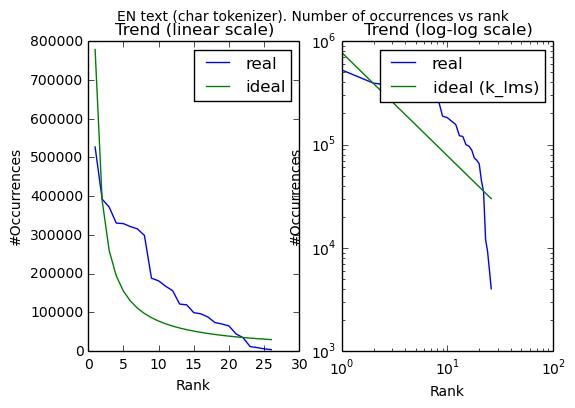

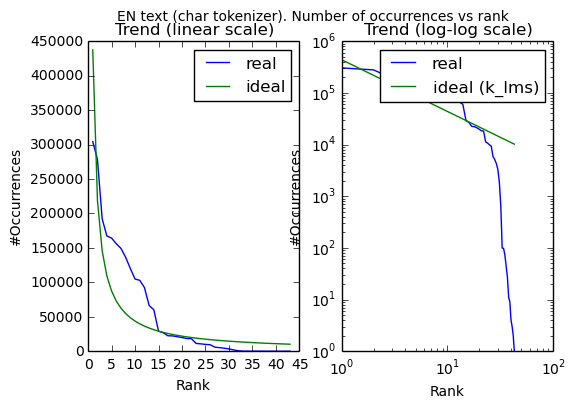

In [9]:
# Visualize trend in EN text
plt.subplot(1,2,1)
plt.hold('on')
h1, = plt.plot(en_char['ranks'],en_char['sorted_occurrences'])
h2, = plt.plot(en_char['ranks'],en_char['ideal'])
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (linear scale)')
plt.legend((h1,h2),('real','ideal'))
plt.subplot(1,2,2)
plt.hold('on')
h3, = plt.plot(en_char['ranks'],en_char['sorted_occurrences'])
h4, = plt.plot(en_char['ranks'],en_char['ideal'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (log-log scale)')
plt.legend((h3,h4),('real','ideal (k_lms)'))
plt.suptitle('EN text (char tokenizer). Number of occurrences vs rank')

plt.figure()

# Visualize trend in ES text
plt.subplot(1,2,1)
plt.hold('on')
h1, = plt.plot(es_char['ranks'],es_char['sorted_occurrences'])
h2, = plt.plot(es_char['ranks'],es_char['ideal'])
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (linear scale)')
plt.legend((h1,h2),('real','ideal'))
plt.subplot(1,2,2)
plt.hold('on')
h3, = plt.plot(es_char['ranks'],es_char['sorted_occurrences'])
h4, = plt.plot(es_char['ranks'],es_char['ideal'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('#Occurrences')
plt.title('Trend (log-log scale)')
plt.legend((h3,h4),('real','ideal (k_lms)'))
plt.suptitle('EN text (char tokenizer). Number of occurrences vs rank')

Clearly, the distribution of the characters is not Zipfian for neither of the two languages. This means that the Zipf Law does not apply to all the possible levels.

Now we obtain the vector of K values and its statisticsmuch like before.

In [10]:
en_char['k_vector'] = compute_k_vector(en_char['sorted_occurrences'])
en_char['k_mean'], en_char['k_std'], en_char['k_cvar'] = compute_statistics(en_char['k_vector'])
print("EN text; proportionality constant K; mean: {}, std: {}, cvar: {}\%".format(
        en_char['k_mean'],en_char['k_std'],en_char['k_cvar']*100))

es_char['k_vector'] = compute_k_vector(es_char['sorted_occurrences'])
es_char['k_mean'], es_char['k_std'], es_char['k_cvar'] = compute_statistics(es_char['k_vector'])
print("ES text; proportionality constant K; mean: {}, std: {}, cvar: {}\%".format(
        es_char['k_mean'],es_char['k_std'],es_char['k_cvar']*100))

EN text; proportionality constant K; mean: 1284225.76923, std: 639017.939517, cvar: 49.7590030373\%
ES text; proportionality constant K; mean: 393799.604651, std: 384663.0062, cvar: 97.6798863322\%


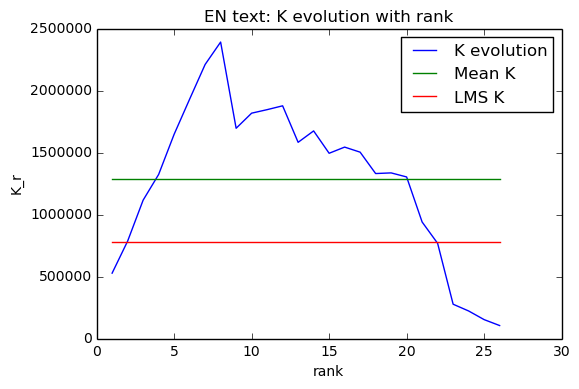

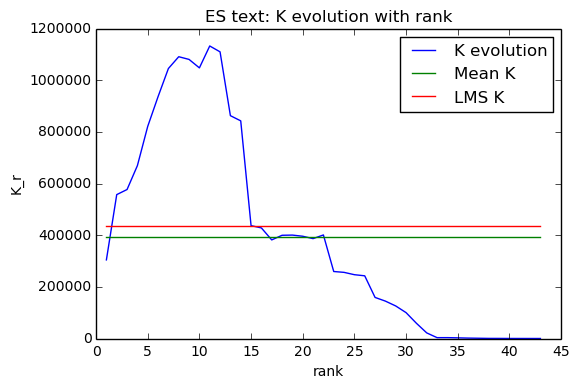

In [11]:
# Print K evolution with the rank, mean K and optimum K (according to LMS criteria) for the EN text
plt.hold('on')
h1, = plt.plot(en_char['ranks'],en_char['k_vector'])
h2, = plt.plot([1,len(en_char['ranks'])], [en_char['k_mean']]*2)
h3, = plt.plot([1,len(en_char['ranks'])], [en_char['k_lms']]*2)
plt.title('EN text: K evolution with rank')
plt.xlabel('rank')
plt.ylabel('K_r')
plt.legend((h1,h2,h3),('K evolution', 'Mean K', 'LMS K'))

plt.figure()

# Print K evolution with the rank, mean K and optimum K (according to LMS criteria) for the ES text
plt.hold('on')
h1, = plt.plot(es_char['ranks'],es_char['k_vector'])
h2, = plt.plot([1,len(es_char['ranks'])], [es_char['k_mean']]*2)
h3, = plt.plot([1,len(es_char['ranks'])], [es_char['k_lms']]*2)
plt.title('ES text: K evolution with rank')
plt.xlabel('rank')
plt.ylabel('K_r')
plt.legend((h1,h2,h3),('K evolution', 'Mean K', 'LMS K'))

The numerical data and the plots clearly reflect an higher mean than before. This is quite understandable since we have fewer different tokens and a much larger number of occurrences per token because of the finer granularity. Curiously the coefficient of variation is lower at the character EN case than in the word EN case. This does not indicate a better fit of the Zipf model in the char case (we can clearly see that the distribution plot in the character case does not resemble a Zipfian distribution at all). Instead, we attribute this counterintuitive fact to randomnes. What this means is that we cannot use the deviation of the K parameter as the only measure of the Zipfian distribution's suitability.

The ES results are as as expected. The coefficient of variation is much greater, (it has risen from 23% to almost 100%).

We conclude that the Zipf Law is not applicable at the char level.

## Conclusions

We have studied two texts in different languages and have verified that the Zipf Law proposes a reasonable empirical approximation of the word distribution. This is a very interesting and intriguing because it is a common fact of Natural Languages itself rather than language. However, the Zipfian distribution fails to adjust to the distribution of the characters.

Regarding the aspects to be improven in this assignment, there is the fact that we do not perform further experimentation with diacritics in this assignment (in the Spanish text). By default, word with the same letters are considered different if they do not share the same diacritics. It could be interesting to see whether there is different between including or removing them (although we suspect there is not much variation). Another possible improvement is to encapsulate some common functionalities in order to have a less bloated code.